# Importing essential Libraries

In [1]:
import pandas as pd 
import numpy as np
import pickle 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
df=pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Exploring the Dataset

In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Cleaning

__Removing the unwanted columns__

In [6]:
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [7]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [8]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [10]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

__Keeping only consistent teams__

In [11]:
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                  'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 
                  'Delhi Daredevils','Sunrisers Hyderabad']       

In [12]:
# df have all the teams right now, so we can take the consistent_teams 
# and filter it out from the batting team and bowling team.

print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [13]:
print(df['bat_team'].unique())      #both teams will be same since we have removed all the unnecessary teams
print(df['bowl_team'].unique())  

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [14]:
#Since to predict the score we need to have atleast 5 overs of data
# Hence removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [16]:
#Converting the column "date" from string  into datetime object

from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


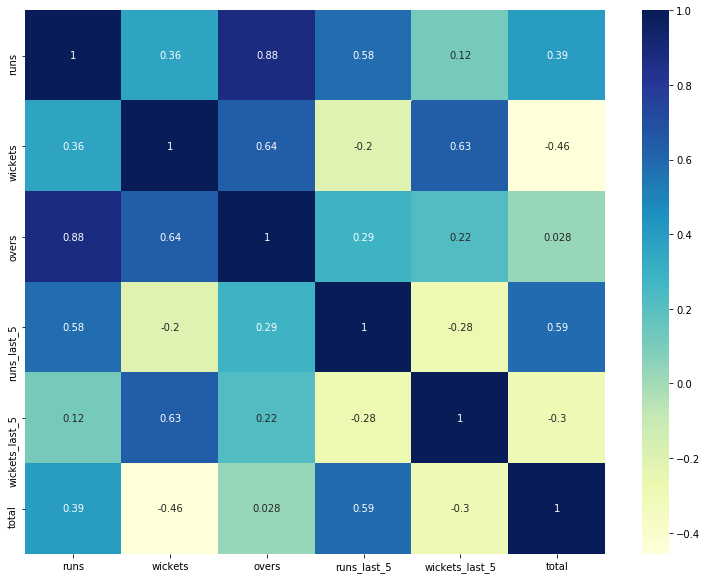

In [17]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='YlGnBu')


# Data Preprocessing

In [18]:
#Converting the categorical features using OneHotEncoding method

encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__Rearranging the columns__

In [19]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [20]:
encoded_df=encoded_df[['date',  'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

# Train Test Split

In [21]:
#Since this is the time series type data so I am spliting the traing dataset <=2016(year) and testing dataset >=2017(year)

X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [22]:
y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

In [23]:
#Removing the date column since it was just required to do train test split

X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

In [24]:
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


# Model Building

I will experiment with 4 different algorithms which are as follows
1. Linear Regression 
2. Decision Tree Regression,
3. Random Forest Regression

----- Boosting Algorithm -----
4. Adaptive Boosting (AdaBoost) Algorithm

## Linear Regression

In [25]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)


In [27]:
from sklearn import metrics
import numpy as np
print("---- Linear Regression - Model Evaluation ----")
print("Mean absolute error (MAE): ",metrics.mean_absolute_error(y_test,y_pred_lr))
print("Mean squared error (MSE): ",metrics.mean_squared_error(y_test,y_pred_lr))
print("Root Mean squared error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

---- Linear Regression - Model Evaluation ----
Mean absolute error (MAE):  12.118617546193295
Mean squared error (MSE):  251.0079231041742
Root Mean squared error(RMSE):  15.8432295667321


## Decision Tree

In [28]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [30]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean absolute error (MAE): ",metrics.mean_absolute_error(y_test,y_pred_dt))
print("Mean squared error (MSE): ",metrics.mean_squared_error(y_test,y_pred_dt))
print("Root Mean squared error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

---- Decision Tree Regression - Model Evaluation ----
Mean absolute error (MAE):  16.751259899208062
Mean squared error (MSE):  518.5885529157667
Root Mean squared error(RMSE):  22.77253944811089


## Random Forest


In [31]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [33]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred_rf))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_rf))
print("Root Mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

---- Random Forest Regression - Model Evaluation ----
Mean absolute error:  13.745396568274536
Mean squared error:  331.38833159405243
Root Mean squared error:  18.204074587686474


__Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm__

## AdaBoost Algorithm

In [34]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=100,
                  random_state=None)

In [35]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [36]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE)",metrics.mean_absolute_error(y_test, y_pred_adb))
print("Mean Squared Error (MSE)",metrics.mean_squared_error(y_test, y_pred_adb))
print("Root Mean Squared Error (RMSE)",np.sqrt(metrics.mean_squared_error(y_test, y_pred_adb)))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE) 12.187751320070767
Mean Squared Error (MSE) 248.96302419986995
Root Mean Squared Error (RMSE) 15.77856217149934


__Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will you simple linear regression model for prediction__

# Creating a Pickle file for the classifier

In [37]:
filename='first-innings-score-lr-model.pkl'
pickle.dump(linear_regressor,open(filename,'wb'))